# Practical Task

In [494]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [495]:
# Import the dataset
diabetes_df = pd.read_csv("diabetes_dirty.csv")
diabetes_df.head(20)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [496]:
# Summary datafrme
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


## What Data we have?
| Columns     |  Type                 |                                 |   
| -------     |  -------------------- | --------------------------------|
| AGE         | [Integer][Continuous] | the age of the person           |
| SEX         | [Integer][Categorical]| the gender of the person        |
| BMI         | [Double][Continuous]  | the body mass index in kg/m2    |
| BP          | [Double][Continuous]  | Blood Pressure, diastolic blood pressure in mm/Hg |
| S1          | [Integer][Continuous] |   ？  |
| S2          | [Double][Continuous]  |   ？  |
| S3          | [Double][Continuous]  |   ？  |
| S4          | [Double][Continuous]  |   ？  |
| S5          | [Integer][Continuous] |   ？  |
| S6          | [Integer][Continuous] |   ？  |
| PROGRESSION | [Integer][Continuous] | the person’s progression |

## Differentiate between the independent variables and the dependent variable
From the Common Scence, the Independent variables (features):       
```
AGE	SEX	BMI	BP	S1	S2	S3	S4	S5	S6  
```  

And dependent variable:  
```
PROGRESSION
```

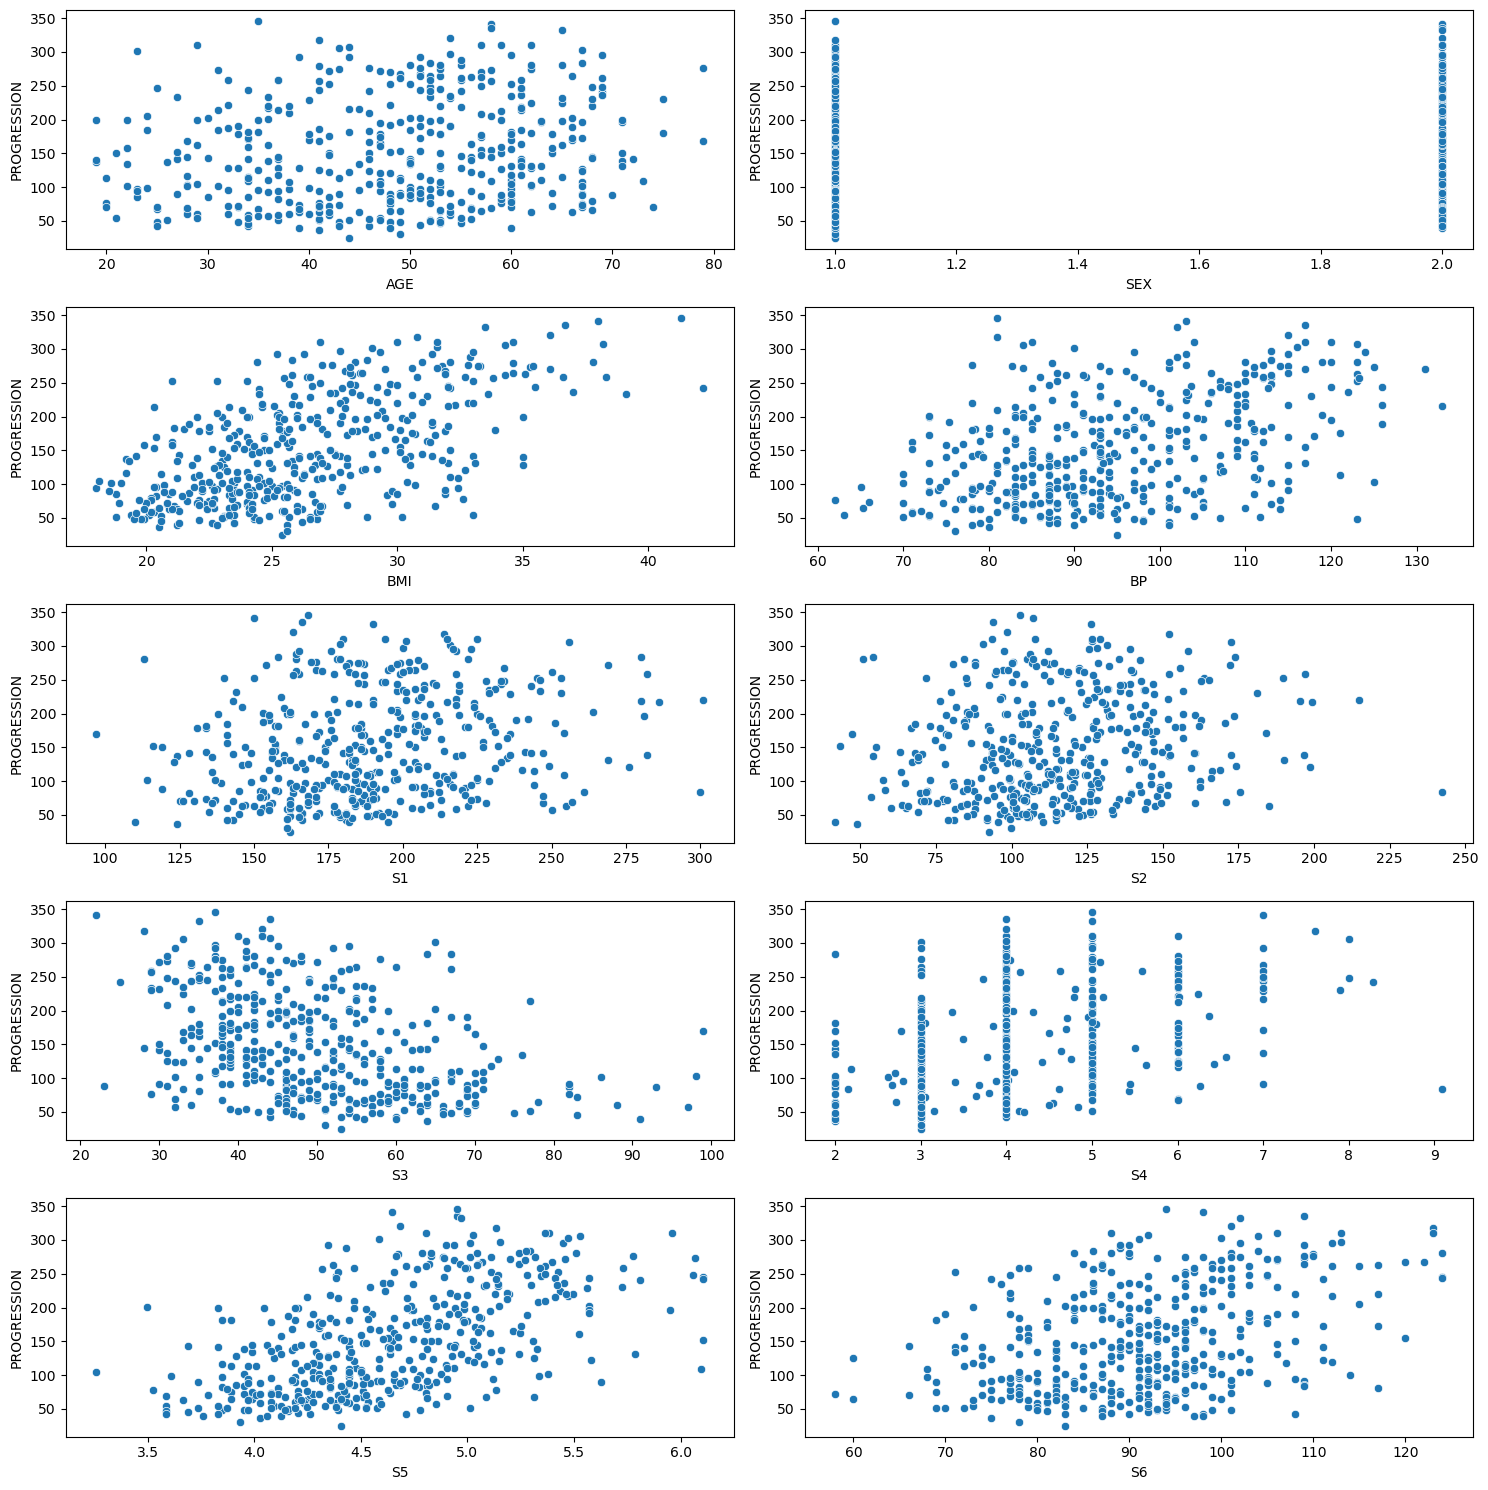

In [497]:
# Features and target
X_feature = diabetes_df.drop("PROGRESSION", axis=1)
y_target = diabetes_df["PROGRESSION"]

#Scatterplots to see correlation between PROGRESSION (target) and features
figure, axs = plt.subplots(5, 2, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(X_feature.columns):
    sns.scatterplot(x=X_feature[col], y=y_target, ax=axs[i])
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

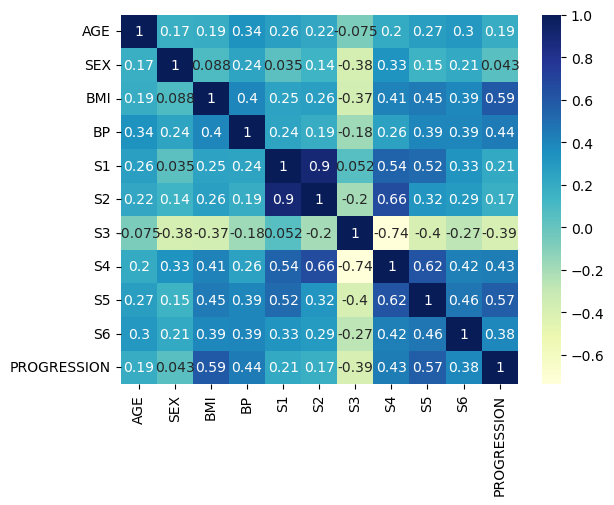

In [498]:
# Draw the heatmap
sns.heatmap(diabetes_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [499]:
# Updating Feature matrix by dropping SEX
X_feature = X_feature.drop("SEX", axis=1)

## Generate training and test sets

In [500]:
# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.2,  random_state=rseed)

# Pint Training and Test data shapes
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (353, 9) (353,)
Test data: (89, 9) (89,)


## Analyse the types of features in this data set

<function matplotlib.pyplot.show(close=None, block=None)>

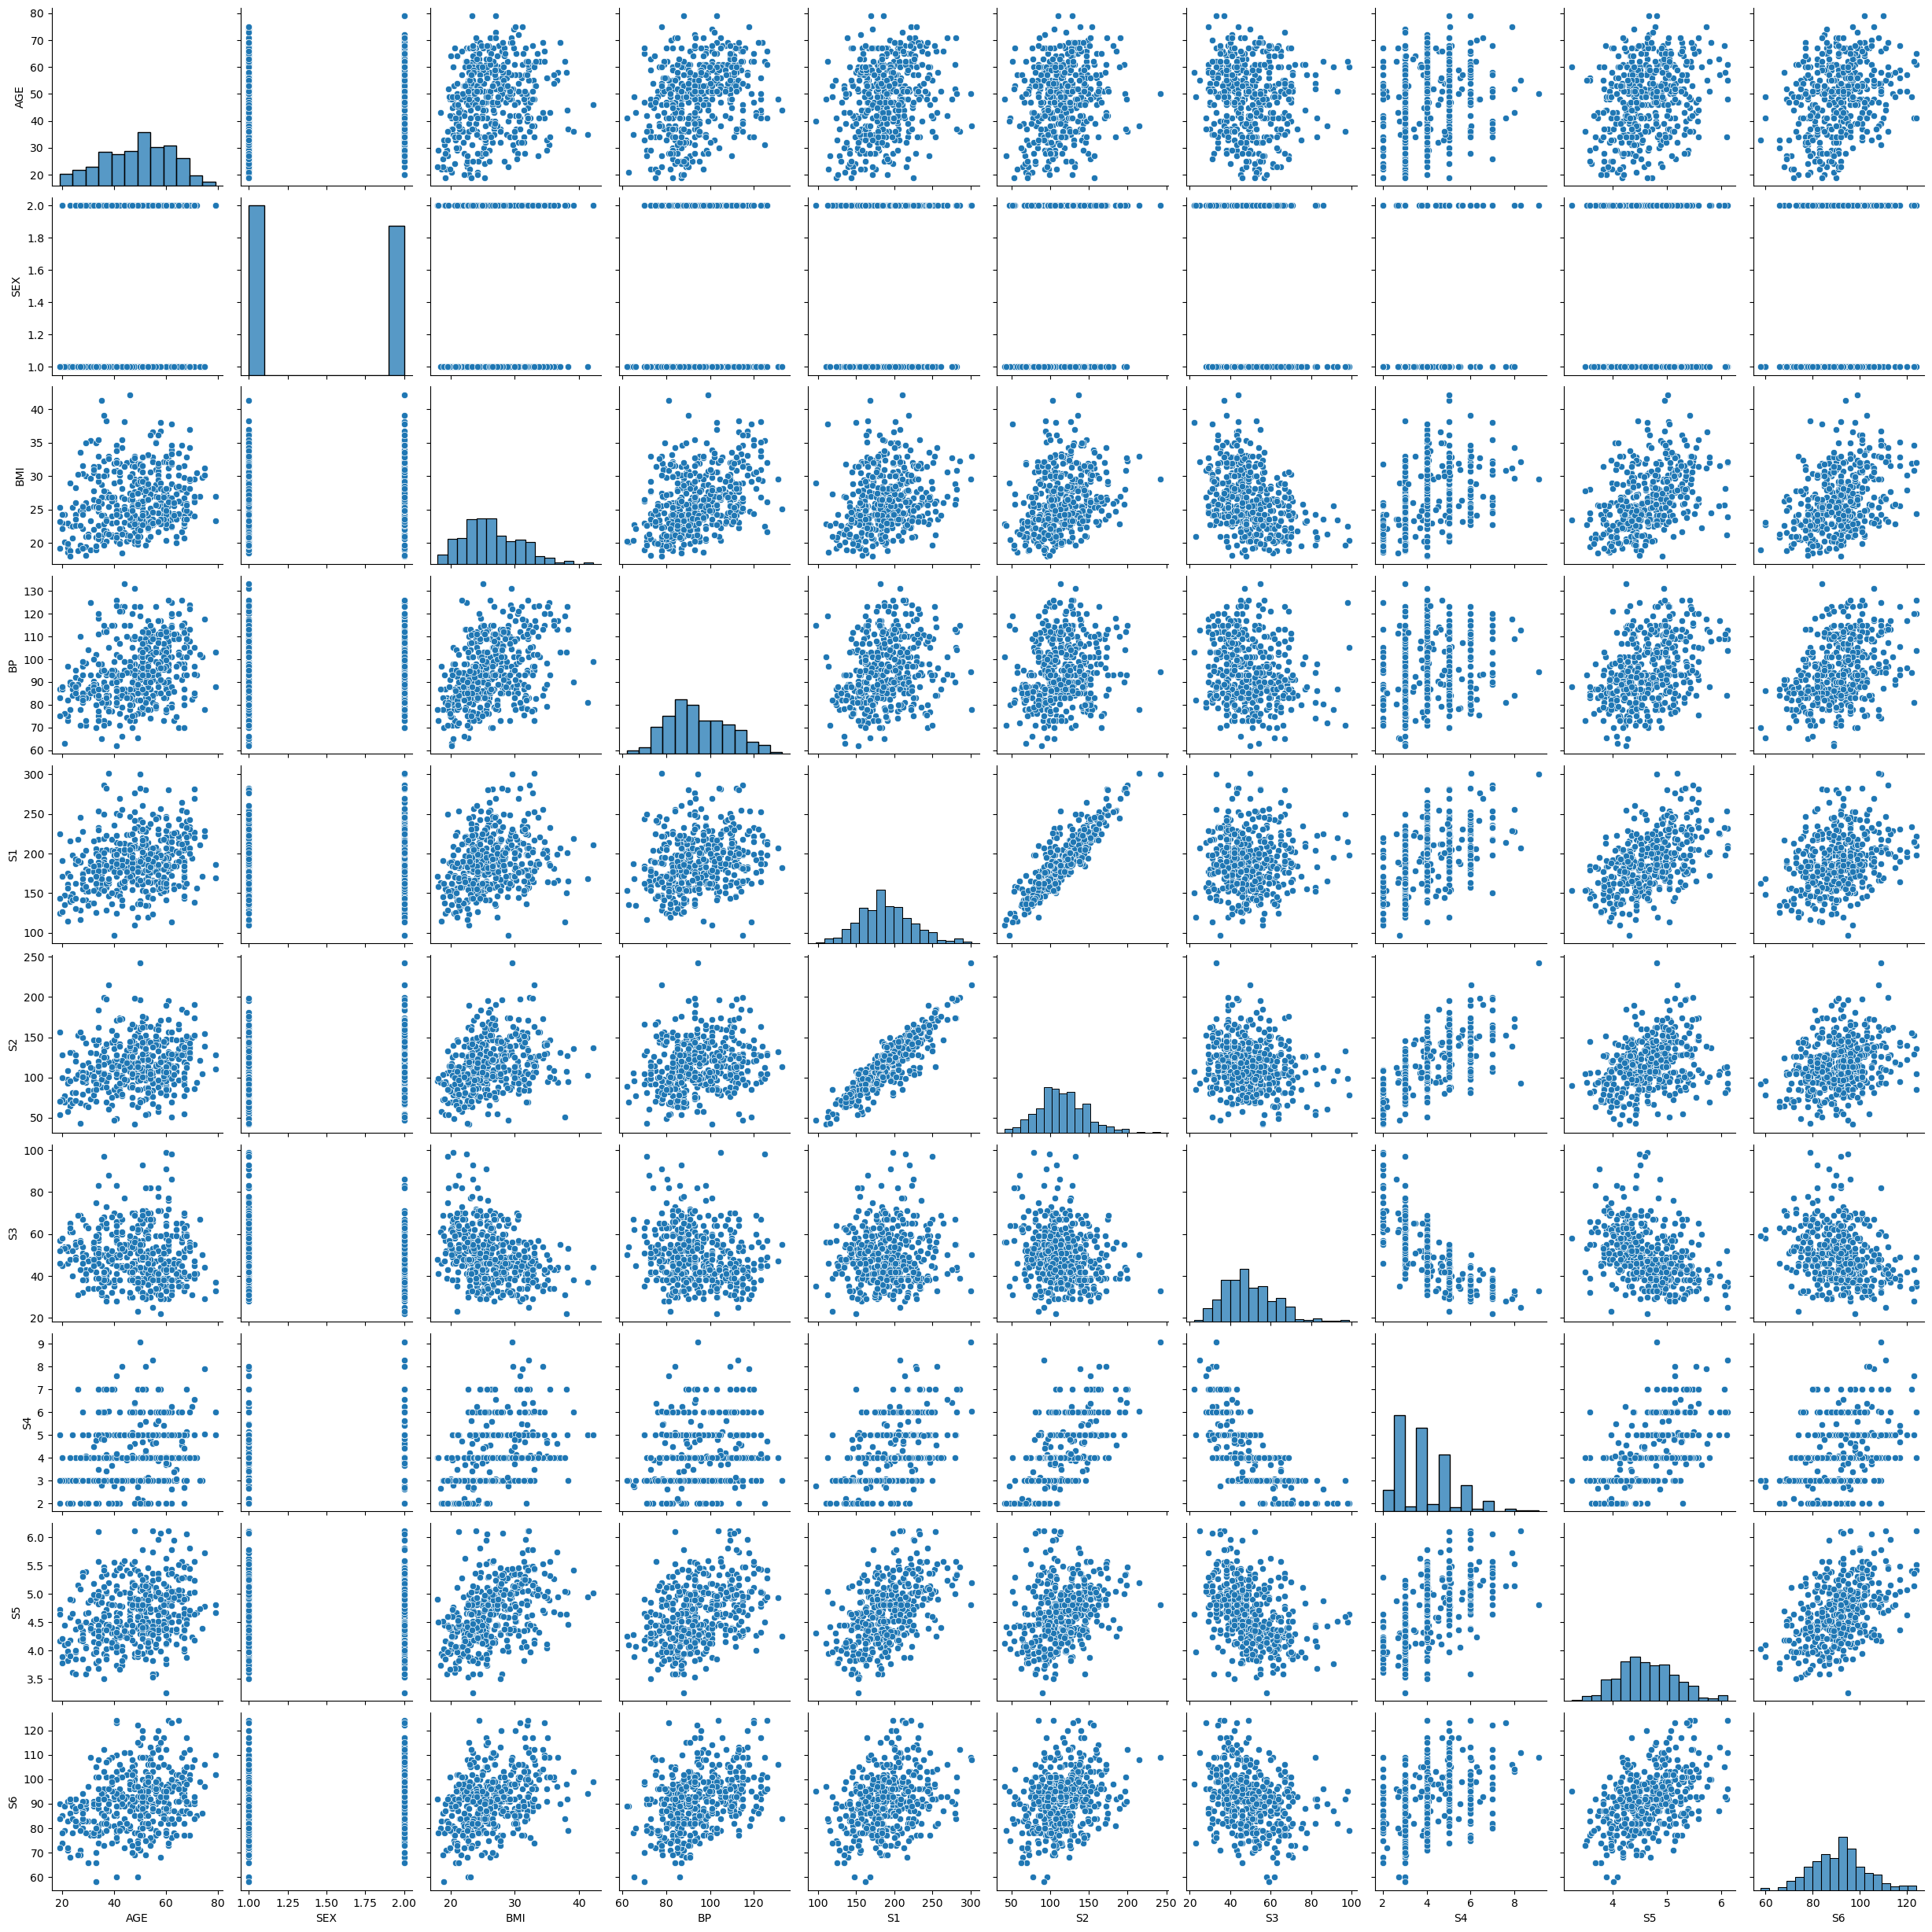

In [501]:
# Plot the distribution of the data
sns.pairplot(data=diabetes_df.drop("PROGRESSION", axis=1))
plt.show

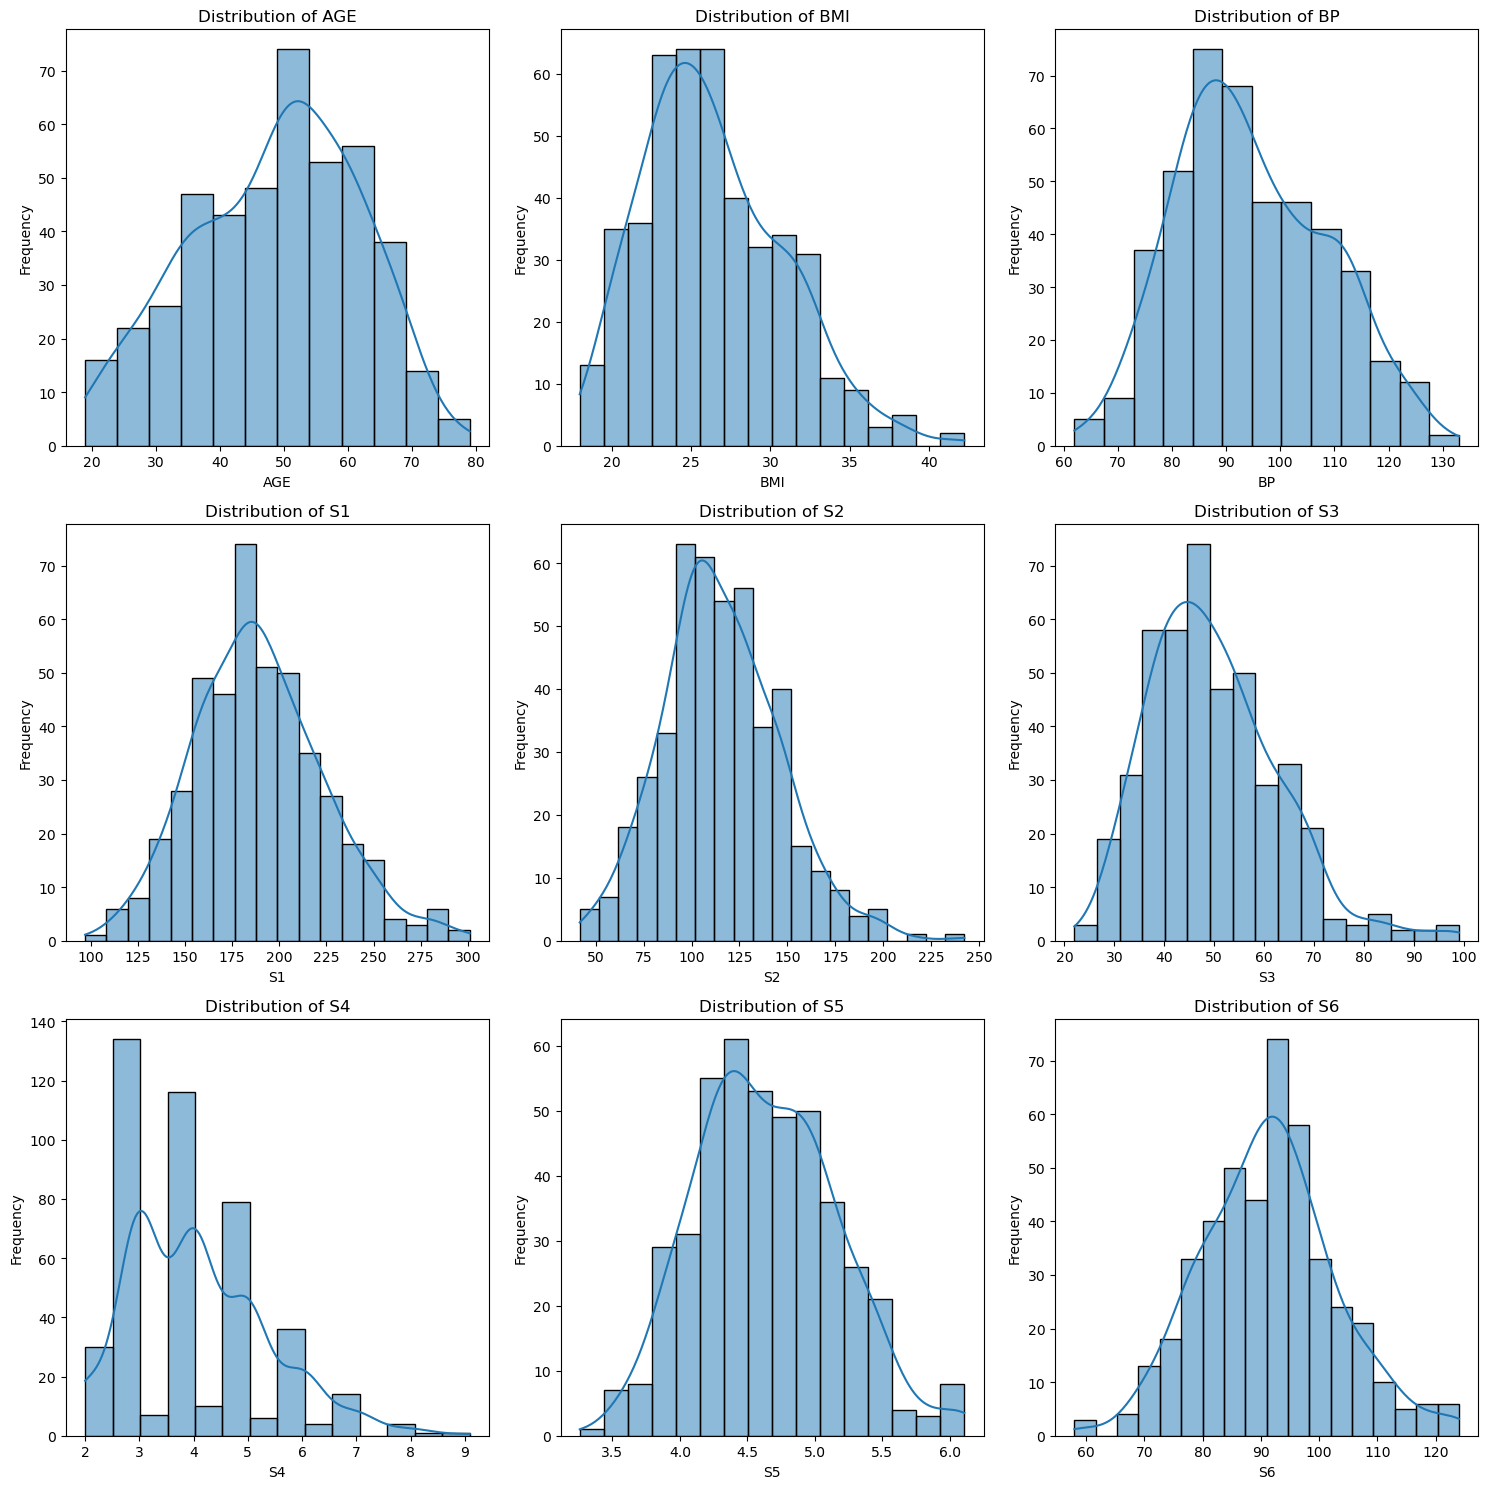

In [502]:
# Plot histogram distribution of features
figure, axs = plt.subplots(3, 3, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(X_feature.columns):
    sns.histplot(x=X_feature[col], kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Feature Scaling, using normalization and standardlization

In [503]:
# Fit the scaler on train data
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Fit and transform the train data
continuous_features = ["AGE", "BMI", "BP", "S1", "S2", "S3","S5", "S6"]
categorical_features = ["S4"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_features] = scaler_standard.fit_transform(X_train[continuous_features])
X_train_scaled[categorical_features] = scaler_normal.fit_transform(X_train[categorical_features])

# Transform the text data
X_test_scaled[continuous_features] = scaler_standard.transform(X_test[continuous_features])
X_test_scaled[categorical_features] = scaler_normal.transform(X_test[categorical_features])

## Generate a multiple linear regression model

In [504]:
# Fit a model
diabete_model = LinearRegression()
model = diabete_model.fit(X_train_scaled, y_train)
y_pred = diabete_model.predict(X_test_scaled)

## Print out the intercept and coefficients of the trained model.

In [505]:
# Print Intercept and Coefficients
print("Intercept: ", diabete_model.intercept_)
print("Coefficients: ", diabete_model.coef_)

# R squared score
score = diabete_model.score(X_test_scaled, y_test)
print (f"R2 Score: {score}")

Intercept:  131.39316396179257
Coefficients:  [ -2.61307243  25.90057324  12.77691325 -48.13736397  30.95993251
  14.90788587  51.71629222  40.69361017   2.71770621]
R2 Score: 0.45990320976618093


## Visualization the errors

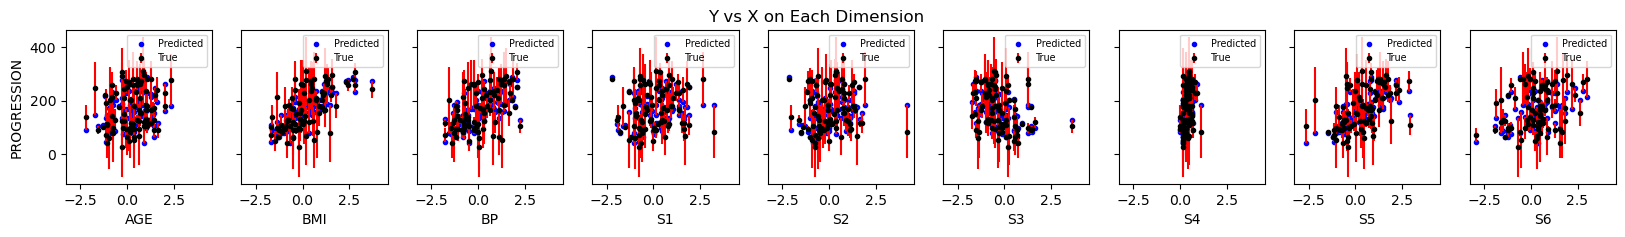

In [506]:
# Plot the errors
fig, ax = plt.subplots(1, X_test_scaled.shape[1], sharey=True, sharex=True, figsize=(20,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(diabetes_df.columns[-1])

# Get values for the error bar
error_bar_values = np.abs((y_test-y_pred))

# Plot data, predicted values, and error bars
for i in range(X_test_scaled.shape[1]):
    ax[i].errorbar(X_test_scaled.iloc[:,i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test_scaled.iloc[:,i], y_pred, c='b', marker='.', label='Predicted')
    ax[i].set_xlabel(X_feature.columns[i])
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

## Compute the performance metrics

In [507]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 3165.3495746610565
Root Mean Squared Error: 56.26143950043455
R-squared: 0.45990320976618093
Mean Absolute Error: 44.78390567585724
